# Project 3

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
from numpy import *

In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree

<Unit('degree')>

In [21]:
params = Params(x = 0 * m, 
                y = 5000 * m,
                vx = 50,
                vy = 0,
                g = 3.7 * m/s**2,
                mass = 900 * kg,
                diameter = 1.5 * m,
                rho = 1.2 * 0.006 * kg/m**3,
                C_d = 0.3,
                angle = 45 * degree,
                velocity = 50 * m / s,
                t_end = 20 * s)

,values
x,0 meter
y,5000 meter
vx,50
vy,0
g,3.7 meter / second ** 2
mass,900 kilogram
diameter,1.5 meter
rho,0.0072 kilogram / meter ** 3
C_d,0.3
angle,45 degree


In [22]:
def make_system(params):
    """Make a system object.
    
    params: Params object with angle, velocity, x, y,
               diameter, duration, g, mass, rho, and C_d
               
    returns: System object
    """
    unpack(params)
    
    # convert angle to degrees
    theta = np.deg2rad(angle)
    
    # compute x and y components of velocity
    vx, vy = pol2cart(theta, velocity)
    
    # make the initial state
    init = State(x=x, y=y, vx=vx, vy=vy)
    
    # compute area from diameter
    area = np.pi * (diameter/2)**2
    
    return System(params, init=init, area=area)

In [23]:
def drag_force(V, system):
    """Computes drag force in the opposite direction of `V`.
    
    V: velocity
    system: System object with rho, C_d, area
    
    returns: Vector drag force
    """
    unpack(system)
    mag = -rho * V.mag**2 * C_d * area / 2
    direction = V.hat()
    f_drag = mag * direction
    return f_drag

In [24]:
def slope_func(state, t, system):
    """Computes derivatives of the state variables.
    
    state: State (x, y, x velocity, y velocity)
    t: time
    system: System object with g, rho, C_d, area, mass
    
    returns: sequence (vx, vy, ax, ay)
    """
    x, y, vx, vy = state
    unpack(system)

    V = Vector(vx, vy)    
    a_drag = drag_force(V, system) / mass
    a_grav = Vector(0, -g)
    
    a = a_grav + a_drag
    
    return vx, vy, a.x, a.y

In [25]:
def event_func(state, t, system):
    """Stop when the y coordinate is 0.
    
    state: State object
    t: time
    system: System object
    
    returns: y coordinate
    """
    x, y, vx, vy = state
    return y

In [26]:
make_system(params)

,values
x,0 meter
y,5000 meter
vx,50
vy,0
g,3.7 meter / second ** 2
mass,900 kilogram
diameter,1.5 meter
rho,0.0072 kilogram / meter ** 3
C_d,0.3
angle,45 degree


In [27]:
def range_func(angle, params):  
    """Computes range for a given launch angle.
    
    angle: launch angle in degrees
    params: Params object
    
    returns: distance in meters
    """
    params = Params(params, angle=angle)
    system = make_system(params)
    results, details = run_ode_solver(system, slope_func, events=event_func)
    finalvy = get_last_value(results.vy) * m / s
    return finalvy

In [28]:
angles = linspace(0, -90, 10)
sweep = SweepSeries()

for angle in angles:
    x_dist = range_func(angle, params)
    print(angle, x_dist)
    sweep[angle] = x_dist

0.0 998.7763970911684 meter
-10.0 983.5335548807828 meter
-20.0 938.4166392315703 meter
-30.0 864.8000830474808 meter
-40.0 764.9227902095528 meter
-50.0 641.8200047974797 meter
-60.0 499.2311163694132 meter
-70.0 341.48618495834876 meter
-80.0 173.37462193318152 meter
-90.0 6.113558829077639e-14 meter


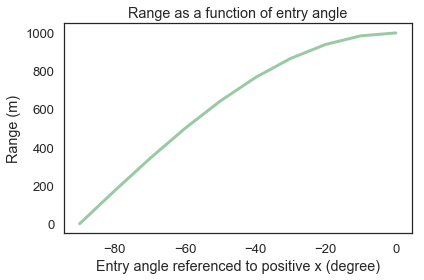

In [29]:
plot(sweep, color='C2')
decorate(xlabel='Entry angle referenced to positive x (degree)',
         ylabel='Range (m)',
         title='Range as a function of entry angle',
         legend=False)

In [33]:
%time res = max_bounded(range_func, [0, 90], params)
res
optimal_angle = res.x * degree
max_x_dist = res.fun

Wall time: 1.86 s


<Quantity(998.7764736987738, 'meter')>